In [1]:
import pandas as pd
import os
import matplotlib.pyplot as plt

In [2]:
cell = "TACTGGTA"
mydir = "cdr3-sampled/"
myfiles = [x for x in os.listdir(mydir) if x.endswith("-IGH_HUMAN-CDR3.csv")]
myfiles = [x for x in myfiles if x.startswith(cell)]
myfiles

['TACTGGTA-1000000_S1.assembled.fastq.gz-IGH_HUMAN-CDR3.csv',
 'TACTGGTA-500000_S1.assembled.fastq.gz-IGH_HUMAN-CDR3.csv',
 'TACTGGTA-500_S1.assembled.fastq.gz-IGH_HUMAN-CDR3.csv',
 'TACTGGTA-1000_S1.assembled.fastq.gz-IGH_HUMAN-CDR3.csv',
 'TACTGGTA-10000_S1.assembled.fastq.gz-IGH_HUMAN-CDR3.csv',
 'TACTGGTA-5000_S1.assembled.fastq.gz-IGH_HUMAN-CDR3.csv',
 'TACTGGTA-100000_S1.assembled.fastq.gz-IGH_HUMAN-CDR3.csv',
 'TACTGGTA-50000_S1.assembled.fastq.gz-IGH_HUMAN-CDR3.csv']

In [3]:
df_ufis = pd.read_csv("ufis-VJC/" + cell + '_S1_L001_R1_001-mapped-ufis.csv', header=None, sep="\t")
df_ufis = df_ufis.rename(columns={0: 'acc', 1: 'ufi'})
df_ufis.head()

,acc,ufi
0,ST-E00127:1241:HHKC7CCX2:5:1101:2463:3296,ATTCAT
1,ST-E00127:1241:HHKC7CCX2:5:1101:27590:3331,TGGGGA
2,ST-E00127:1241:HHKC7CCX2:5:1101:12023:3366,GTTGGG
3,ST-E00127:1241:HHKC7CCX2:5:1101:6705:3964,TATATA
4,ST-E00127:1241:HHKC7CCX2:5:1101:24637:4016,TAATCT


In [4]:
def readCdr3(f):
    c = f.split("-")
    barcode = c[0]
    sequences = int(c[1].split("_")[0])
    chain = c[2].replace("_HUMAN", "")
    df = pd.read_csv(mydir + f, header=None, sep="\t")
    df = df.rename(columns={0: 'acc', 4: 'cdr3'})
    df['barcode'] = barcode
    df['sequences'] = sequences
    df['chain'] = chain
    cols = ['barcode', 'sequences', 'chain', 'acc', 'cdr3']
    df = df[cols]
    return(df)

In [5]:
if os.path.getsize(mydir + myfiles[0]) > 0:
    df_cdr3 = readCdr3(myfiles[0])
else:
    df_cdr3 = pd.DataFrame({'barcode':[], 'sequences':[], 'chain':[], 'acc':[], 'cdr3':[]})
for f in myfiles[1:]:
    if os.path.getsize(mydir + f) > 0:
        df_cdr3 = pd.concat([df_cdr3, readCdr3(f)])

In [6]:
df_cdr3.head()

,barcode,sequences,chain,acc,cdr3
0,TACTGGTA,1000000,IGH,ST-E00127:1241:HHKC7CCX2:5:1224:14164:63613,CATRGYCSGASCYKVYYYGMDVW
1,TACTGGTA,1000000,IGH,ST-E00127:1241:HHKC7CCX2:5:2210:3924:38526,CATRGYCSGASCYKVYYYGMDVW
2,TACTGGTA,1000000,IGH,ST-E00127:1241:HHKC7CCX2:5:2109:21399:39546,CATRGYCSGASCYKVYYYGMDVW
3,TACTGGTA,1000000,IGH,ST-E00127:1241:HHKC7CCX2:5:2205:29082:22370,CATRGYCSGARCYKVYYYGMDVW
4,TACTGGTA,1000000,IGH,ST-E00127:1241:HHKC7CCX2:5:2209:18812:38016,CATRGYCSGASCYKVYYYGMDVW


In [7]:
df_cdr3.tail()

,barcode,sequences,chain,acc,cdr3
3,TACTGGTA,100000,IGH,ST-E00127:1241:HHKC7CCX2:5:1211:18578:6390,CATRGYCSGASCYKVYYYGMDVW
4,TACTGGTA,100000,IGH,ST-E00127:1241:HHKC7CCX2:5:2117:27184:41409,CATRGYCSGASCYKVYYYGMDVW
0,TACTGGTA,50000,IGH,ST-E00127:1241:HHKC7CCX2:5:2203:5893:19399,CASRRYCSGASCYKVYYYGMDVW
1,TACTGGTA,50000,IGH,ST-E00127:1241:HHKC7CCX2:5:1104:20273:41567,CATRGYCSGASCYKVYYYGMDVW
2,TACTGGTA,50000,IGH,ST-E00127:1241:HHKC7CCX2:5:1216:24951:8851,CATRGYCSGASCYKVYYYGMDVW


## Link ufis to cdr3s

In [8]:
df = pd.merge(df_cdr3, df_ufis, how='left', on='acc')
df.head()

,barcode,sequences,chain,acc,cdr3,ufi
0,TACTGGTA,1000000,IGH,ST-E00127:1241:HHKC7CCX2:5:1224:14164:63613,CATRGYCSGASCYKVYYYGMDVW,GTGTAG
1,TACTGGTA,1000000,IGH,ST-E00127:1241:HHKC7CCX2:5:2210:3924:38526,CATRGYCSGASCYKVYYYGMDVW,ATAACT
2,TACTGGTA,1000000,IGH,ST-E00127:1241:HHKC7CCX2:5:2109:21399:39546,CATRGYCSGASCYKVYYYGMDVW,GTATTG
3,TACTGGTA,1000000,IGH,ST-E00127:1241:HHKC7CCX2:5:2205:29082:22370,CATRGYCSGARCYKVYYYGMDVW,GTATTG
4,TACTGGTA,1000000,IGH,ST-E00127:1241:HHKC7CCX2:5:2209:18812:38016,CATRGYCSGASCYKVYYYGMDVW,ACTTTT


## Count ufis

In [9]:
df_summary = df.groupby(['barcode', 'sequences', 'chain']).agg({'cdr3': 'nunique', 'ufi': 'nunique'}).reset_index()
df_summary

,barcode,sequences,chain,cdr3,ufi
0,TACTGGTA,10000,IGH,1,1
1,TACTGGTA,50000,IGH,2,2
2,TACTGGTA,100000,IGH,2,2
3,TACTGGTA,500000,IGH,7,11
4,TACTGGTA,1000000,IGH,9,14


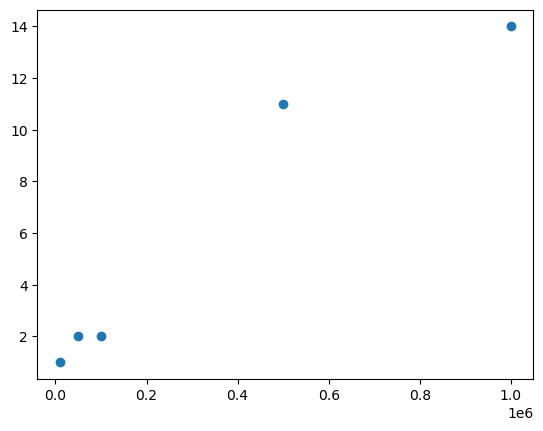

In [10]:
plt.scatter(df_summary['sequences'], df_summary['ufi'])
plt.show()